In [15]:
import pandas as pd

# Load cleaned data
cleaned_file_path = 'cleaned_nifty50_data.csv'
nifty50_data = pd.read_csv(cleaned_file_path)

# Check the loaded data
nifty50_data.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,-1,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,-1,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,-1,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,-1,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,-1,816123.0,0.2741


In [16]:
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Group by 'Symbol' to calculate average closing price and trading volume per stock
stock_features = nifty50_data.groupby('Symbol').agg({
    'Close': 'mean', 
    'Volume': 'mean'
}).reset_index()

# Rename columns for clarity
stock_features.columns = ['Symbol', 'Avg_Close', 'Avg_Volume']

# Check the data
stock_features.head()


,Symbol,Avg_Close,Avg_Volume
0,ADANIPORTS,294.111766,3.909287e+06
1,ASIANPAINT,1247.410903,5.096721e+05
2,AXISBANK,824.058898,6.916522e+06
3,BAJAJ-AUTO,2190.412196,4.114639e+05
4,BAJAJFINSV,2758.657451,2.315312e+05


In [18]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (Avg_Close and Avg_Volume)
scaler = StandardScaler()

# Apply standard scaling
scaled_features = scaler.fit_transform(stock_features[['Avg_Close', 'Avg_Volume']])

# Create a new dataframe with the scaled features
scaled_stock_features = pd.DataFrame(scaled_features, columns=['Scaled_Avg_Close', 'Scaled_Avg_Volume'])
scaled_stock_features['Symbol'] = stock_features['Symbol']

# Check the scaled features
scaled_stock_features.head()


,Scaled_Avg_Close,Scaled_Avg_Volume,Symbol
0,-0.573753,0.274053,ADANIPORTS
1,0.065675,-0.792660,ASIANPAINT
2,-0.218289,1.217647,AXISBANK
3,0.698196,-0.823475,BAJAJ-AUTO
4,1.079348,-0.879934,BAJAJFINSV


In [20]:
from sklearn.cluster import KMeans

# Set the number of clusters (you can try different values)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model on the scaled features
scaled_stock_features['Cluster'] = kmeans.fit_predict(scaled_stock_features[['Scaled_Avg_Close', 'Scaled_Avg_Volume']])

# Check the clusters assigned to each stock
scaled_stock_features.head()


,Scaled_Avg_Close,Scaled_Avg_Volume,Symbol,Cluster
0,-0.573753,0.274053,ADANIPORTS,2
1,0.065675,-0.792660,ASIANPAINT,0
2,-0.218289,1.217647,AXISBANK,2
3,0.698196,-0.823475,BAJAJ-AUTO,0
4,1.079348,-0.879934,BAJAJFINSV,0


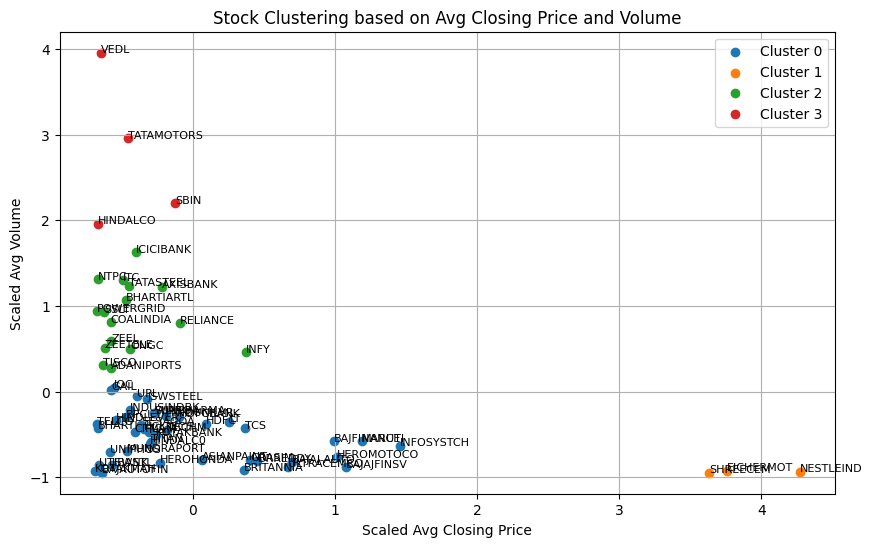

In [21]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))

# Iterate through the clusters and plot them
for cluster in range(4):
    cluster_data = scaled_stock_features[scaled_stock_features['Cluster'] == cluster]
    plt.scatter(cluster_data['Scaled_Avg_Close'], cluster_data['Scaled_Avg_Volume'], label=f'Cluster {cluster}')
    
    # Adding labels for each stock
    for i in range(len(cluster_data)):
        plt.text(cluster_data['Scaled_Avg_Close'].values[i], 
                 cluster_data['Scaled_Avg_Volume'].values[i], 
                 cluster_data['Symbol'].values[i], 
                 fontsize=8)

# Label axes
plt.xlabel('Scaled Avg Closing Price')
plt.ylabel('Scaled Avg Volume')

# Title and legend
plt.title('Stock Clustering based on Avg Closing Price and Volume')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

